<a href="https://colab.research.google.com/github/guannan11/DFE5/blob/main/Simplified_Algorithm_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
datapath = 'https://raw.githubusercontent.com/a-forty-two/DFE5/main/breastcancer_data.csv'
data = pd.read_csv(datapath, header=0)
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.2419,0.07871
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.1812,0.05667
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.2069,0.05999
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.2597,0.09744
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.1809,0.05883


In [ ]:
data.info()
#no null values for us!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1138 entries, 0 to 1137
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1138 non-null   int64  
 1   diagnosis               1138 non-null   object 
 2   radius_mean             1138 non-null   float64
 3   texture_mean            1138 non-null   float64
 4   perimeter_mean          1138 non-null   float64
 5   area_mean               1138 non-null   float64
 6   smoothness_mean         1138 non-null   float64
 7   compactness_mean        1138 non-null   float64
 8   concavity_mean          1138 non-null   float64
 9   symmetry_mean           1138 non-null   float64
 10  fractal_dimension_mean  1138 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 97.9+ KB


In [ ]:
correlations = data.corr() 
correlations 

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
id,1.000000,0.052010,0.069534,0.050988,0.067529,-0.009038,0.000067,0.034903,-0.015412,-0.036598
radius_mean,0.052010,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.147741,-0.311631
texture_mean,0.069534,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.071401,-0.076437
perimeter_mean,0.050988,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.183027,-0.261477
area_mean,0.067529,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.151293,-0.283110
smoothness_mean,-0.009038,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.557775,0.584792
compactness_mean,0.000067,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.602641,0.565369
concavity_mean,0.034903,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.500667,0.336783
symmetry_mean,-0.015412,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,1.000000,0.479921
fractal_dimension_mean,-0.036598,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.479921,1.000000


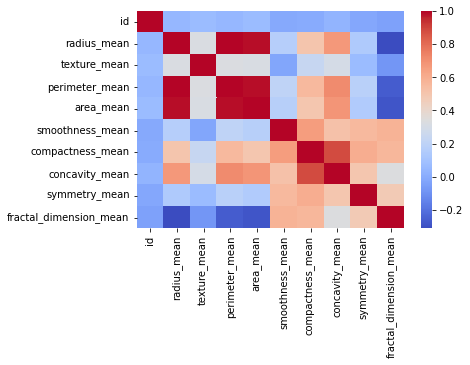

In [ ]:
import seaborn as sns # visualization library 
sns.heatmap(correlations, cmap='coolwarm') # coolwarm-> red and blue color style

In [ ]:
# convert ID to indexes instead of removing!
data = data.set_index("id")
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
id,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.2419,0.07871
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.1812,0.05667
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.2069,0.05999
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.2597,0.09744
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.1809,0.05883


In [ ]:
# Normalizing data 
# ONLY for input! 
# output-> in our case is M and B
# ML only happens on numbers!
# way to convert M and B into 1 and 0 

In [ ]:
# all X1...xN-> normalize
# all y -> encode into numbers

In [ ]:
y = data.loc[:, ['diagnosis']]
x = data.iloc[:, 1:]

In [ ]:
y.head()

,diagnosis
id,
842302,M
842517,M
84300903,M
84348301,M
84358402,M


In [ ]:
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
id,,,,,,,,,
842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.2419,0.07871
842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.1812,0.05667
84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.2069,0.05999
84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.2597,0.09744
84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.1809,0.05883


In [ ]:
import sklearn 
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain,ytest = train_test_split(x, y, test_size=0.2)

In [ ]:
xtrain.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
id,,,,,,,,,
93070,9.042,18.90,60.07,244.5,0.09968,0.1972,0.1975,0.2330,0.08743
8712064,12.340,22.22,79.85,464.5,0.10120,0.1015,0.0537,0.1551,0.06761
863031,11.640,18.33,75.17,412.5,0.11420,0.1017,0.0707,0.1801,0.06520
93034,19.400,18.18,127.20,1145.0,0.10370,0.1442,0.1626,0.1893,0.05892
863030,13.110,15.56,87.21,530.2,0.13980,0.1765,0.2071,0.1925,0.07692


In [ ]:
xtest.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
id,,,,,,,,,
93270,12.88,18.22,84.45,493.1,0.12180,0.16610,0.048250,0.1709,0.07253
8610908,12.86,18.00,83.19,506.3,0.09934,0.09546,0.038890,0.1718,0.05997
926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.243900,0.1726,0.05623
894089,12.49,16.85,79.19,481.6,0.08511,0.03834,0.004473,0.1215,0.05673
9012568,15.19,13.21,97.65,711.8,0.07963,0.06934,0.033930,0.1721,0.05544


In [ ]:
# Normalize the data
# Calculate mean and standard dev for training data
# apply the same assumptions to testing data also

In [ ]:
stats = xtrain.describe().T
stats

,count,mean,std,min,25%,50%,75%,max
radius_mean,910.0,14.248518,3.588439,6.98100,11.710000,13.460000,16.155000,28.11000
texture_mean,910.0,19.346341,4.307637,9.71000,16.210000,18.890000,21.840000,39.28000
perimeter_mean,910.0,92.807275,24.767694,43.79000,75.460000,87.210000,106.525000,188.50000
area_mean,910.0,666.810769,360.701471,143.50000,420.625000,558.650000,807.200000,2501.00000
smoothness_mean,910.0,0.096392,0.014194,0.05263,0.086443,0.095780,0.105400,0.16340
compactness_mean,910.0,0.105413,0.053336,0.01938,0.066010,0.094035,0.131300,0.34540
concavity_mean,910.0,0.090217,0.079370,0.00000,0.029870,0.065920,0.134475,0.42680
symmetry_mean,910.0,0.181717,0.027128,0.11670,0.163025,0.179850,0.196200,0.30400
fractal_dimension_mean,910.0,0.062659,0.006922,0.04996,0.057800,0.061325,0.066075,0.09744


In [ ]:
xmean = stats['mean']
xstd = stats['std']


In [ ]:
xtrain_norm = (xtrain - xmean)/xstd
xtest_norm = (xtest - xmean)/xstd

In [ ]:
xtrain_norm.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
id,,,,,,,,,
93070,-1.450914,-0.103616,-1.321773,-1.170804,0.231648,1.720909,1.351686,1.890449,3.578846
8712064,-0.531852,0.667108,-0.523152,-0.560881,0.338732,-0.073366,-0.460092,-0.981161,0.715359
863031,-0.726923,-0.235939,-0.712108,-0.705045,1.254583,-0.069616,-0.245904,-0.059592,0.367175
93034,1.435578,-0.270761,1.388612,1.325720,0.514857,0.727215,0.911971,0.279545,-0.540126
863030,-0.317274,-0.878983,-0.225991,-0.378736,3.058106,1.332806,1.472639,0.397506,2.060418


In [ ]:
logic = { 'M': 1, 'B': 0}
ytrain_encoded = ytrain['diagnosis'].map(lambda diag: logic[diag])
ytest_encoded = ytest['diagnosis'].map(lambda diag: logic[diag])


In [ ]:
ytest_encoded

id
93270      0
8610908    0
926424     1
894089     0
9012568    0
          ..
901315     0
93188      0
93068      0
905978     0
906024     0
Name: diagnosis, Length: 228, dtype: int64

In [ ]:
# syntax: lambda variable: what to do with the variable 

tomato = lambda tom: tom + 1 
tomato(42)

43